<a href="https://colab.research.google.com/github/sotha-sil-zen/MCM/blob/main/assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import numpy as np, matplotlib as mpl, scipy as sp
from matplotlib import pylab, mlab, pyplot as plt
from matplotlib.pylab import plot, scatter, contour
from tqdm.notebook import tqdm, trange

from numpy import sqrt, pi, exp, log, floor, ceil, sin, cos
from numpy.linalg import norm

rng = np.random.default_rng()

Text(0.5, 1.0, 'PDF of p')

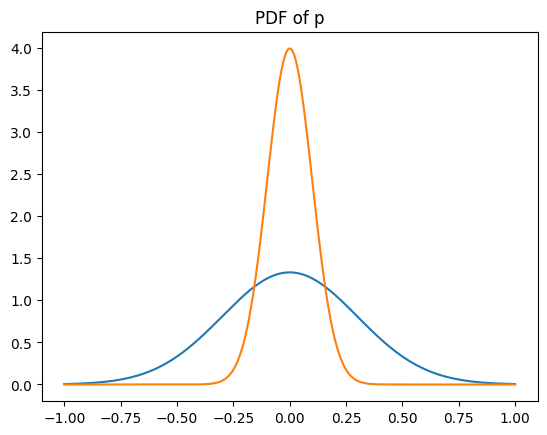

In [3]:
p_sigma = 0.3
q_sigma = 0.1
target_lowerbound=-1.0
target_upperbound=1.0
target_center=0.0

x = np.linspace(target_lowerbound, target_upperbound, 1000)

p_a = (target_lowerbound-target_center) / p_sigma
p_b = (target_upperbound-target_center) / p_sigma
p_rv = sp.stats.truncnorm(a=p_a, b=p_b, loc=0, scale=p_sigma)
p = sp.stats.truncnorm.pdf(x, p_a, p_b, loc=0, scale=p_sigma)

plt.plot(x, p, label='p')

q_a = (target_lowerbound-target_center) / q_sigma
q_b = (target_upperbound-target_center) / q_sigma
q_rv = sp.stats.truncnorm(a=q_a, b=q_b, loc=0, scale=q_sigma)
q = sp.stats.truncnorm.pdf(x, q_a, q_b, loc=0, scale=q_sigma)

plt.plot(x, q, label='q')

plt.title('PDF of p')


Text(0.5, 1.0, 'PDF of p')

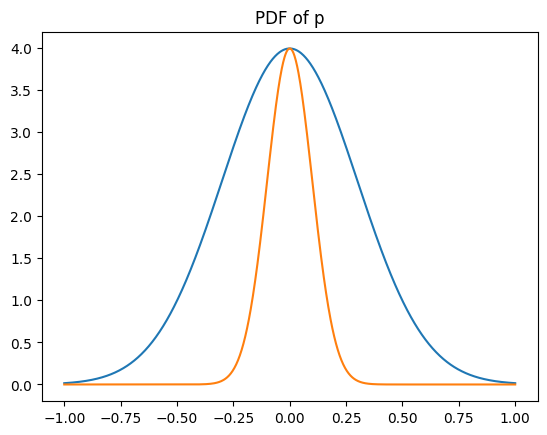

In [4]:
M=np.max(np.divide(q,p))
plt.plot(x, p*M, label='Mp')
plt.plot(x, q, label='q')

plt.title('PDF of p')

Text(0.5, 1.0, 'PDF of p')

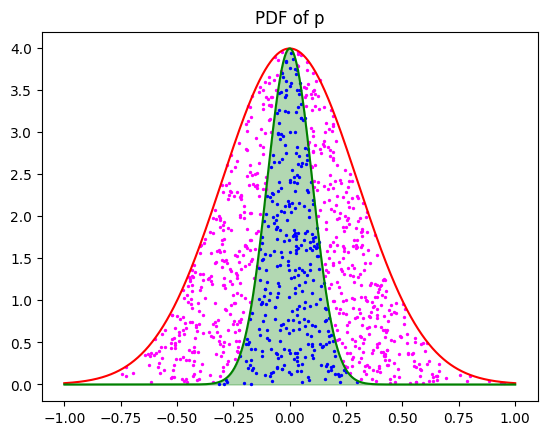

In [5]:
N=1000
test_x=np.array([])
while len(test_x)<N:
  random_p=np.random.normal(loc=0.0,scale=0.3,size=100)
  idx=np.where(np.logical_and(random_p>=target_lowerbound,random_p<=target_upperbound))[0]
  test_x=np.concatenate((test_x,random_p[idx]))
test_x=test_x[:N]

U=np.random.uniform(0.0,1.0,N)

test_p=sp.stats.truncnorm.pdf(test_x, p_a, p_b, loc=0, scale=p_sigma)
test_val=test_p*U*M
test_q=sp.stats.truncnorm.pdf(test_x, q_a, q_b, loc=0, scale=q_sigma)

idx0=np.where(test_val>=test_q)[0]
idx1=np.setdiff1d(np.arange(N),idx0)
plt.plot(x, p*M, label='Mp',color='red')
plt.plot(x, q, label='q',color='green')
plt.fill_between(x, q,color='green',alpha=0.3)
plt.scatter(test_x[idx0],test_val[idx0],s=2,label='scatter',color='magenta')
plt.scatter(test_x[idx1],test_val[idx1],s=2,label='scatter',color='blue')

plt.title('PDF of p')

In [6]:
n=10000
u0=np.random.uniform(0,1,n//2)
u1=np.random.uniform(0,1,n//2)

z0=np.sqrt(-2*np.log(u0))*np.cos(2*np.pi*u1)
z1=np.sqrt(-2*np.log(u0))*np.sin(2*np.pi*u1)

samples=np.concatenate((z0,z1))


In [7]:
samples=np.sort(samples)

In [10]:
def F(xx:np.ndarray):
  result = np.sum(samples[:, None] <= xx, axis=0)/len(samples)
  return result

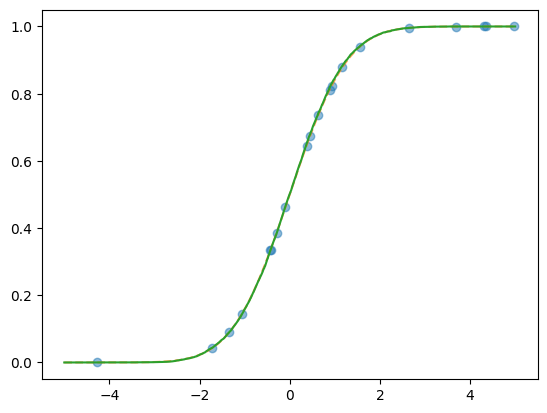

In [11]:
xx = np.linspace(-5, 5, num=1000)
# Choose 20 random points from X in an array X1
X1=np.random.uniform(-5, 5, 20)
X1=np.sort(X1)
F1=sp.stats.norm.cdf(X1)

# Compute the exact CDF at these points in an array F1.
plot( X1, F1, 'o', alpha=.5, label='data' )
plot( xx, sp.stats.norm.cdf(xx), '--', alpha=.7, label='actual' )
plot( xx, F(xx), label='Computed' )

In [12]:
def p1(xx:np.array,s:float):
  dspl=sp.interpolate.UnivariateSpline(xx,F(xx),s=s).derivative()(xx)
  return dspl

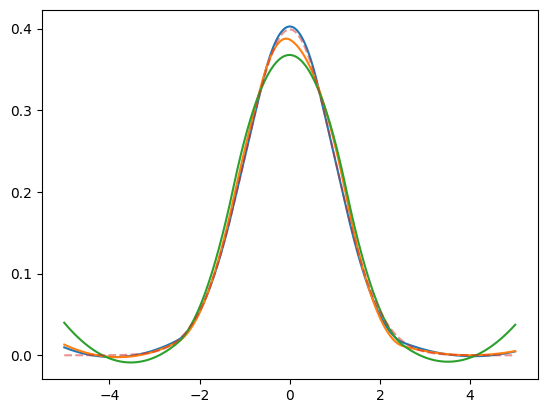

In [13]:
for s in [0.001,0.01, 0.05]: # Choose two illustrative values
    plot(xx, p1(xx, s), label=f's={s:.3f}' )

plot(xx, sp.stats.norm.pdf( xx ), '--', label='actual', alpha=.5 )

In [14]:
def p2(xx:np.array,s:float):
  dens,intervals=np.histogram(samples,bins=np.linspace(np.min(xx),np.max(xx),100),density=True)
  mids=(intervals[:-1] + intervals[1:]) / 2
  print(dens)
  dspl=sp.interpolate.UnivariateSpline(mids,dens,s=s)(xx)
  return dspl

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.00099 0.00099 0.00099 0.      0.      0.00198 0.      0.00198
 0.00099 0.00396 0.00198 0.00396 0.00693 0.01386 0.02178 0.02178 0.03168
 0.02772 0.03663 0.06534 0.06831 0.08613 0.09108 0.10494 0.11187 0.15048
 0.16929 0.17622 0.21978 0.23265 0.25641 0.30492 0.29403 0.31086 0.37917
 0.38214 0.3762  0.40788 0.41184 0.38511 0.40392 0.38709 0.39699 0.38214
 0.3564  0.31581 0.31185 0.29502 0.28215 0.22275 0.21087 0.18216 0.17226
 0.13662 0.10989 0.10791 0.09108 0.07227 0.06237 0.05742 0.03366 0.03366
 0.02277 0.02079 0.01881 0.01188 0.00693 0.01485 0.00396 0.00297 0.00495
 0.00099 0.      0.00198 0.00198 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.00099 0.00099 0.00099 0.      0.      0.00198 0.      0.00198
 0.00099 0.00396 0.00198 0.00396 0.00693 0.01386 0.02178 0.02178 

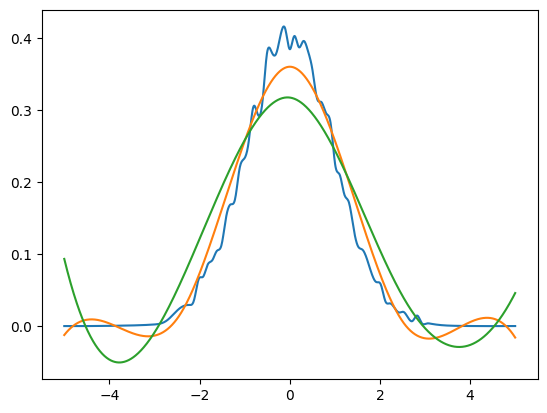

In [15]:
for s in [0.0001, 0.05,0.2]: # Choose two illustrative values
    plot( xx, p2(xx, s), label=f's={s:.3f}' )